# Estudando Condensados de Bose-Einstein com a Equação de Gross-Pitaevskii

* PET - Física UFRN
* Petiano: Tiago Pernambuco Toledo de Macêdo
* Data: 24 de Maio de 2024

$\quad$ O condensado de Bose-Einstein é uma fase da matéria formada por um fluido de bósons (partículas de spin inteiro) a temperaturas muito próximas do zero absoluto. Nesse regime, todos os bósons dentro de fluido tendem a ocupar os estados de menor energia, efetivamente colocando todos no mesmo estado quântico, o que faz com que algumas propriedades características da mecânica quântica se manifestem mesmo em escalas macroscópicas.

$\quad$ O objetivo deste `Notebook` é dar uma breve introdução à física dos condensados de Bose-Einstein através das soluções da equação de Gross-Pitaevskii, uma extensão não-linear à equação de Schrödinger que descreve bem essa fase da matéria. Ao longo do `Notebook` vamos derivar a equação de Gross-Pitaevskii, resolvê-la numericamente e utilizar nossas soluções numéricas para elucidar algumas propriedades dos condensados.

$\quad$ Este `Notebook` possui 4 seções:

1. Introdução Teórica;
2. Resolvendo a Equação de Gross-Pitaevskii;
3. Resultados;
4. Conclusão.

### Importando Bibliotecas

In [1]:
import matplotlib.pyplot as plt
from numpy import *

### Versões dos Softwares

In [2]:
%load_ext version_information
%version_information Matplotlib, Numpy

Software versions
Python 3.9.16 64bit [MSC v.1916 64 bit (AMD64)]
IPython 8.12.0
OS Windows 10 10.0.19045 SP0
Matplotlib 3.5.1
Numpy 1.24.0
Fri May 24 10:22:44 2024 Hora Padrão de Buenos Aires

## 1. Introdução Teórica

$\quad$ Nesta seção introduziremos um pouco da história que levou à previsão teórica da existência dos condensados de Bose-Einstein e desenvolveremos as ferramentas matemáticas para tratá-los.

### 1.1. Bósons e Férmions

$\quad$ Uma primeira discussão pertinente ao desenvolvimento da teoria dos condensados de Bose-Einstein é a da indistinguibilidade de partículas idênticas na mecânica quântica.

$\quad$ Na física clássica, dado que tenhamos um sistema de $N$ partículas idênticas, é perfeitamente possível que “etiquetemos” elas como $p_1, p_2, …, p_N$ de forma que possamos seguir univocamente a dinâmica de cada uma dessas partículas se quisermos. Na mecânica quântica, porém, perdemos o cenário determinístico clássico e somos forçados a observar apenas probabilidades de encontrarmos uma dada partícula numa determinada região do espaço. Caso tenhamos um sistema de $N$ partículas idênticas $p_1, …, p_N$, é impossível distinguir qual das $N$ partículas foi observada em uma dada região a qualquer momento. Essa noção é comumente chamada de Princípio da Indistinguibilidade de Partículas Idênticas e é a base para um resultado importantíssimo da teoria quântica, que demonstro a seguir $^{[1]}$.

$\quad$ Um sistema quântico arbitrário formado por $N$ partículas pode ser descrito por uma função de onda $\Psi(\xi_1, \xi_2, …, \xi_N)$ tal que a probabilidade de encontrar o sistema num determinado estado é dada por $|\Psi(\xi_1, \xi_2, …, \xi_N)|^2$, onde os $\xi_i$ representam o conjunto das variáveis que define o estado da i-ésima partícula. A título de ilustração, tipicamente os $\xi_i$ são dados pela posição espacial da partícula $\vec{r}_i$ e seu spin $\vec{\sigma}_i$. Como as partículas idênticas são efetivamente indistinguíveis, temos que permutações entre partículas do sistema não devem ter efeito algum sobre as probabilidades de se encontrar o sistema em um determinado estado. Presumamos, sem perda de generalidade, que a permutação foi entre as partículas $1$ e $2$. Podemos então escrever:

$$|\Psi(\xi_1, \xi_2, ..., \xi_N)|^2 = |\Psi(\xi_2, \xi_1, ..., \xi_N)|^2 \ .$$

$\quad$ Isso significa que a ação da permutação na função de onda é apenas de alterar a fase do sistema, ou seja, 

$$\Psi(\xi_1, \xi_2, ..., \xi_N) = e^{i\alpha}\Psi(\xi_2, \xi_1, ..., \xi_N) \ . \tag{1.1}$$

$\quad$ Uma vez que $|e^{i\alpha}|^2 = 1 \space \space \forall \alpha \in \mathbb{R}$. Realizando a mesma permutação novamente em **(1.1)**, temos:

$$\Psi(\xi_1, \xi_2, ..., \xi_N) = e^{2i\alpha}\Psi(\xi_1, \xi_2, ..., \xi_N) \implies e^{2i\alpha} = (e^{i\alpha})^2 = 1 \ . \tag{1.2}$$

$\quad$ Assim, temos duas possibilidades:

$$e^{i\alpha} = \pm 1$$

$\quad$ Com isso, vemos que, para partículas idênticas, a função de onda do sistema pode ser simétrica ($e^{i\alpha} = 1$) ou antissimétrica ($e^{i\alpha} = -1$) com relação a permutações arbitrárias entre pares de partículas. Isso nos diz que, na mecânica quântica, efetivamente existem dois tipos diferentes de partículas. Atualmente, chamamos de bósons as partículas que têm função de onda simétrica com relação à permutação e de férmions os de função de onda antissimétricas. Sabemos também que os bósons são partículas de spin inteiro e obedecem às estatísticas de Bose-Einstein, enquanto os férmions têm spin semi-inteiro e obedecem às estatísticas de Fermi-Dirac.

$\quad$ Uma das diferenças mais pronunciadas entre os comportamentos de sistemas de bósons idênticos e de férmions idênticos é que os férmions obedecem ao princípio da exclusão de Pauli, que dita que num sistema de férmions idênticos, nenhum deles pode ocupar um estado quântico igual a outro férmion do sistema. Isso gera fenômenos bastante característicos em sistemas fermiônicos, como o que se pode observar nos estados de ocupação de elétrons em orbitais atômicos. 

$\quad$ Em contraste com os férmions, os bósons não têm essa limitação e podem inclusive se encontrar todos num mesmo estado quântico ao mesmo tempo. É esse tipo de configuração que define o condensado de Bose-Einstein.

### 1.2. Uma Breve História da Condensação de Bose-Einstein

$\quad$ A física estatística de sistemas bosônicos foi desenvolvida inicialmente pelo físico indiano Satyendra Nath Bose em 1924 para sistemas compostos por fótons, os quanta de luz e posteriormente generalizado por Albert Einstein para partículas com massa. Em 1925, Einstein postulou que, em baixas temperaturas, gases de átomos não interagentes deviam apresentar uma transição de fase para um estado em que todos os átomos seriam “condensados” para o estado de menor energia $^{[2]}$. 

$\quad$ Inicialmente, essa previsão não teve muita importância prática, porém, resultados posteriores como a teoria de gases de Bose interagentes de Bogoliubov de 1947 e a invenção e o aperfeiçoamento de técnicas de aprisionamento e resfriamento de átomos durante os anos 70 e 80 deram origem a novas ondas de interesse no fenômeno de condensação de Bose-Einstein. No entanto, na metade dos anos 90, diversos laboratórios ao redor do mundo conseguiram realizar experimentalmente em átomos de rubídio e finalmente observar esse até então elusivo estado da matéria. O entendimento teórico do comportamento dos condensados foi altamente impactado pelo desenvolvimento e estudo da equação que descreve o estado desses condensados por Eugene P. Gross e Lev Petrovich Pitaevskii em 1961 $^{[2]}$. Essa equação, conhecida como equação de Gross-Pitaevskii é o que vou derivar na próxima seção.

### 1.3. A Equação de Gross-Pitaevskii

$\quad$ Tomemos primeiramente um gás diluído de $N$ bósons idênticos fracamente interagentes sob a ação de um potencial externo arbitrário. Temos que a função de onda do sistema será da forma $\Psi(\vec{r}_1, \vec{r}_2, ..., \vec{r}_N)$ com a condição de normalização $\int |\Psi|^2dr = 1$ (com a integral calculada em todo o espaço). Como estamos trabalhando com um gás diluído, podemos desconsiderar as correlações entre os bósons do gás, uma vez que serão muito fracas e terão quase nenhuma influência na dinâmica do sistema. Assim, podemos utilizar a aproximação de Hartree e escrever $\Psi(\vec{r}_1, \vec{r}_2, ..., \vec{r}_N) = \prod_{i=1}^N \psi(\vec{r}_i)$. Onde os $\psi(\vec{r}_i)$ são as funções de onda das partículas individuais. Escrevendo o Hamiltoniano de uma partícula individual qualquer temos:

$$\hat{H}_i = \frac{\hat{P}_i^2}{2m} + V(\vec{r}_i) + U_{int} \ .$$

$\quad$ Na qual, $\hat{P}_i = i\hbar \nabla_i$ é o momento da i-ésima partícula, $V(\vec{r}_i)$ é o potencial externo e $U_{int}$ é a energia de interação da partícula $i$ com as outras $N-1$ partículas do sistema. Como estamos usando a aproximação de Hartree, aproximamos essas interações por interações de campo médio da seguinte forma:

$$U_{int} = \int \psi^*(\vec{r}) U(\vec{r} - \vec{r}_i)\psi(\vec{r}) dr \ . \tag{1.3}$$

$\quad$ Como em um gás diluído a distância média entre as partículas tende a ser muito maior do que as distâncias, na qual, as interações entre elas são relevantes. Assim, podemos presumir que as interações só contribuem à energia quando as partículas interagentes estão muito próximas e escrever $U(\vec{r} - \vec{r}_i) = g\delta^3(\vec{r} - \vec{r}_i)$, onde $\delta^3(x)$ é a função delta de Dirac em 3 dimensões e $g := \int U(\vec{r}) dr$ é uma constante de acoplamento que define a intensidade das interações entre os bósons. Tipicamente utiliza-se a aproximação de Born da Teoria do Espalhamento para encontrar:

$$g = \frac{4\pi\hbar^2a}{m} \ . \tag{1.4}$$

$\quad$ Onde $a$ é a distância de espalhamento do espalhamento causado pelas interações e $m$ é a massa dos bósons do gás. Neste `Notebook`, porém, como efeitos de espalhamentos não serão estudados, utilizaremos apenas $g$ por simplicidade de notação. Substituindo $U(\vec{r} - \vec{r}_i) = g\delta^3(\vec{r} - \vec{r}_i)$ na Equação **(1.3)** encontramos:

$$U_{int} = \int \psi^*(\vec{r}) U(\vec{r} - \vec{r}_i)\psi(\vec{r}) dr = \int \psi^*(\vec{r}) g\delta^3(\vec{r} - \vec{r}_i)\psi(\vec{r}) dr = g|\psi(\vec{r}_i)|^2 \ . \tag{1.5}$$

$\quad$ Tomando o Hamiltoniano total do sistema como a soma dos Hamiltonianos de cada partícula, temos:

$$\hat{H} = \sum_{i = 1}^N -\frac{\hbar^2}{2m} \nabla_i^2 + V(\vec{r}_i) +  \frac{1}{2}\sum_{i \neq j} g\delta^3(\vec{r}_i - \vec{r}_j) \ . \tag{1.6}$$

$\quad$ Onde os índices da segunda soma se apresentam daquela forma para evitar contar cada termo duas vezes e não contar interações entre uma partícula e ela própria.

$\quad$ Não é nem um pouco óbvio, a partir desse Hamiltoniano, como podemos encontrar a função de onda do condensado. Para fazer isso, presumiremos que a função de onda total do condensado é dada por $\Phi = \sqrt{N}\Psi$, tal que a condição de normalização do sistema se torna $\int |\Phi|^2dr = N$, ou seja, $n(\vec{r}) := |\Phi(\vec{r})|^2$ é a densidade de partículas em $\vec{r}$ e construiremos primeiro o funcional de energia do sistema, $E = \int \Phi^*\hat{H}\Phi dr$.

$$E = \int \Phi^*\hat{H}\Phi dr = \int \sum_{i = 1}^N \Phi^* \left [-\frac{\hbar^2}{2m} \nabla_i^2 + V(\vec{r}_i) +  \frac{1}{2}\sum_{i \neq j} g\delta^3(\vec{r}_i - \vec{r}_j)\right]\Phi dr_1 dr_2...dr_N  \ . \tag{1.7}$$

$\quad$ Como estamos usando a aproximação de Hartree, e o termo de interação interparticular é o dado pela Equação **(1.5)**, esse funcional se simplifica para:

$$E = N\int -\frac{\hbar^2}{2m}|\nabla\Psi(\vec{r})|^2 + V(\vec{r})|\Psi(\vec{r})|^2 + Ng|\Psi(\vec{r})|^4 dr \ . \tag{1.8}$$

$\quad$ Um estado fundamental válido para um condensado de Bose-Einstein deve então ser dado ao minimizar esse funcional com a restrição $\int |\Psi|^2 dr = 1$, ou seja, o número de átomos no condensado é constante. Isso pode ser feito utilizando multiplicadores de Lagrange. Definimos então $X = E - \mu N$, onde $\mu$ é o multiplicador de Lagrange da restrição. A equação de Euler-Lagrange correspondente ao funcional $X$ obtida ao desconsiderar termos com $\frac{1}{N}$ é a seguinte:

$$\left[-\frac{\hbar^2}{2m}\nabla^2 + V(\vec{r}) + g|\Phi(\vec{r})|^2 \right]\Phi(\vec{r}) = \mu \Phi(\vec{r}) \ . \tag{1.9}$$

$\quad$ Onde o multiplicador de Lagrange $\mu$ toma significado físico como o potencial químico da substância que compõe o gás. O potencial químico pode ser definido como a energia associada a variações no número de partículas no condensado ($\mu := \frac{dE}{dN}$) e é independente do valor de $N$, sendo associado ao tipo de bóson que forma o condensado. A Equação **(1.9)** é chamada equação de Gross-Pitaevskii e as soluções dela são as funções de onda que descrevem estados de condensados de Bose-Einstein.

## 2. Resolvendo a Equação de Gross-Pitaevskii

$\quad$ Com a introdução teórica terminada, podemos formular o problema concreto que vamos resolver e começar a escrever os códigos para resolvê-lo.

### 2.1. Equação de Gross-Pitaevskii com Simetria Esférica

$\quad$ Neste `Notebook` trataremos a equação de Gross-Pitaevskii para condensados de Bose-Einstein com simetria esférica, ou seja, o valor da função de onda do sistema em algum ponto só depende da distância desse ponto à origem do sistema. Assim, $\Phi(\vec{r}) = \Phi(r)$, onde $r = |\vec{r}|$. Substituindo a forma do operador laplaciano em coordenadas esféricas e tomando $V(r) = \frac{1}{2}m\omega^2r^2$ (o potencial correspondente a uma armadilha atômica de oscilador harmônico com frequência angular $\omega$) na Equação **(1.9)** chegamos à seguinte equação:

$$\left[ -\frac{\hbar^2}{2m}\frac{1}{r} \frac{d}{dr}\left(r \frac{d}{dr}\right) + \frac{1}{2}m\omega^2r^2 + g|\Phi(r)|^2\right] \Phi(r) = \mu \Phi(r) \ . \tag{2.1}$$

$\quad$ Para resolver a Equação **(2.1)** numericamente, vamos primeiro definir um sistema de unidades que facilite nosso trabalho$^{[3]}$. Definamos $x = r \sqrt{\frac{m\omega}{\hbar}}$, $\alpha =  \frac{\mu}{\hbar \omega}$ tal que $\Phi(x) = \Phi(r)\sqrt{\frac{2g}{\hbar \omega}}$. Com isso, reescrevemos a Equação **(2.1)**:

$$\frac{d^2\Phi(x)}{dx^2} = -\frac{1}{x}\frac{d\Phi(x)}{dx} + x^2\Phi(x) + c|\Phi(x)|^2\Phi - 2\alpha\Phi(x) \ . \tag{2.2}$$

$\quad$ Para chegar da equação **(2.1)** à Equação **(2.2)** calculamos a derivada $\frac{d}{dr}\left(r\frac{d\Phi(r)}{dr}\right)$ através da regra do produto, realizamos as substituições descritas e definimos $c = \pm 1$ que carrega o sinal de $g$, uma vez que seu módulo foi absorvido pela função de onda na substituição realizada. Para $c = 1$ temos que os bósons do condensado tem uma interação repulsiva e para $c = -1$ temos uma interação atrativa entre eles. Neste `Notebook`, focaremos em sistemas com interações atrativas ($c = -1$).

$\quad$ Um último tópico a se discutir antes de seguir para a solução numérica da Equação **(2.2)** é o comportamento assintótico de $\Phi(x)$ quando $x \rightarrow \infty$. Como o potencial que escolhemos para nosso sistema nas nossas novas unidades adimensionais é $x^2$, ou seja, o potencial cresce com a distância, temos que a função de onda deve tender a se concentrar próximo a $x = 0$, ou seja, $\lim_{x \rightarrow \infty}\Phi(x) = 0$. Com isso, temos que o termo de interação interparticular $c|\Phi(x)|^2\Phi(x)$ deve decrescer a $0$ muito rápido quando aumentamos $x$. Assim, no limite assintótico, vale a seguinte expressão:

$$ \left[\frac{d^2}{dx^2} + \frac{1}{x}\frac{d}{dx} - x^2 + 2\alpha \right]\Phi(x) = 0 \ . $$

$\quad$ Essa equação é solúvel analiticamente e tem como soluções as funções da seguinte forma:

$$ \lim_{x \rightarrow \infty} \Phi(x) = Ke^{-\frac{x^2}{2} + (\alpha - 1)ln(x)} \ .$$

$\quad$ Onde $K$ é uma constante de normalização. Nesse limite, $\frac{d\Phi(x)}{dx} = [-x + \frac{\alpha - 1}{x}]K e^{-\frac{x^2}{2} + (\alpha - 1)ln(x)}$, ou seja, $\frac{d\Phi(x)}{dx} = [-x + \frac{\alpha - 1}{x}]\Phi(x)$. Assim, temos a seguinte informação sobre o comportamento assintótico da nossa função de onda $\Phi(x)$:

$$\lim_{x \rightarrow \infty} \left(\frac{d\Phi(x)}{dx} - \left[-x + \frac{\alpha -1}{x}\right]\Phi(x)\right) \approx 0 \ . \tag{2.3}$$

$\quad$ Esse resultado será muito útil mais tarde.

### 2.2. Solução Numérica

$\quad$ Para resolver a Equação **(2.2)**, utilizaremos o método proposto na referência [3]. Utilizaremos o método de Runge-Kutta de 4ª ordem para resolver a Equação **(2.2)** com as condições de contorno de que $\frac{d\Phi}{dx}(0) = 0$ (que implica em $\Phi(0) = const.$) e a condição assintótica discutida anteriormente, $\lim_{x \rightarrow \infty} \Phi(x) = 0$. Com isso, podemos definir as variáveis relevantes:

In [11]:
# Termo representativo do potencial químico. Valores diferentes para alpha definem soluções diferentes para a equação.
alpha = 0

# Define o tipo de interação. Aqui, utilizaremos c = -1 pois estudamos uma interação atrativa.
c = -1

# Ponto central do espaço (r = 0)
a = 0

# Limite superior de x, onde a condição dada pela equação (2.3) deve valer.
b = 5

# Passo utilizado na discretização do espaço.
h = 0.0001

$\quad$ Com essas variáveis definidas, podemos escrever as funções para a utilização do método de Runge-Kutta. Para utilizá-lo para equações diferenciais ordinárias de segunda ordem, como é o caso da equação de Gross-Pitaevskii, devemos separar a equação em um sistema de equações diferenciais de primeira ordem acopladas. Assim, definimos:

$$u = \Phi(x) \ .$$

$$v =\frac{d\Phi(x)}{dx} \ .$$

$\quad$ Tal que obtenhamos as equações acopladas:

$$\frac{du}{dx}  = v \ ,$$

$$\frac{dv}{dx} = -\frac{1}{x}v + x^2u + c|u|^2u - 2\alpha u \ .$$

$\quad$ Essas são equações às quais podemos aplicar facilmente o método de Runge-Kutta:

In [12]:
# Computa as derivadas de u e v.
def f(vec, x):
    u, v = vec

    return array([v, -1/x*v + x**2*u + c*abs(u)**2*u - 2*alpha*u], complex)

# Realiza um passo do método de Runge-Kutta de quarta ordem, ou seja, dado Phi(x), retorna Phi(x + h).
def RK4(vec, x):
    
    k1 = h*f(vec,x)
    k2 = h*f(vec+0.5*k1,x+0.5*h)
    k3 = h*f(vec+0.5*k2,x+0.5*h)
    k4 = h*f(vec+k3,x+h)
    
    return vec+(1/6)*(k1+2*k2+2*k3+k4)

$\quad$ Definidas essas funções, podemos encontrar a função de onda de um condensado de Bose-Einstein resolvendo a equação de Gross-Pitaevskii. A condição inicial $\frac{d\Phi}{dx}(0) = 0$ nos dá um valor inicial para a derivada da função de onda, porém, não nos diz nada sobre o valor exato de $\Phi(0)$. Vamos então chutar um valor para $\Phi(0)$:

C:\Users\tiago\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


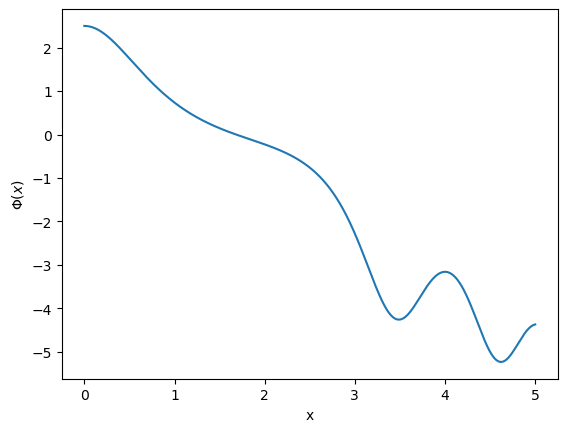

In [13]:
Phi0 = 2.5

vec = array([Phi0, 0], complex)
phivec = [vec[0]]

for x in arange(a+h, b, h):
    vec = RK4(vec, x)

    phivec.append(vec[0])

plt.xlabel('x')
plt.ylabel(r'$\Phi(x)$')
plt.plot(arange(a, b, h), phivec)

$\quad$ Não é difícil ver que há algo de muito errado com a solução acima. A solução que buscamos deveria cair para 0 conforme $x$ aumenta e não continuar para $\Phi(x) < 0$ como acontece no gráfico. Isso acontece, pois, como não utilizamos o valor correto de $\Phi(0)$, a função de onda encontrada não é a correta e, consequentemente, não possui o mesmo limite assintótico. Isso pode parecer um problema grande, mas, na verdade, é justamente a solução! A solução de uma equação diferencial de segunda ordem é completamente definida por duas condições iniciais, e, nesse caso, só reforçamos uma delas na nossa solução. Se encontrarmos uma forma de fazer com que $\Phi(x)$ caia para 0 conforme $x$ cresce, temos a garantia de que a solução correspondente será a solução correta. Antes de qualquer coisa, tentaremos outro valor para $\Phi(0)$ e veremos se conseguimos entender melhor como resolver esse problema.

C:\Users\tiago\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


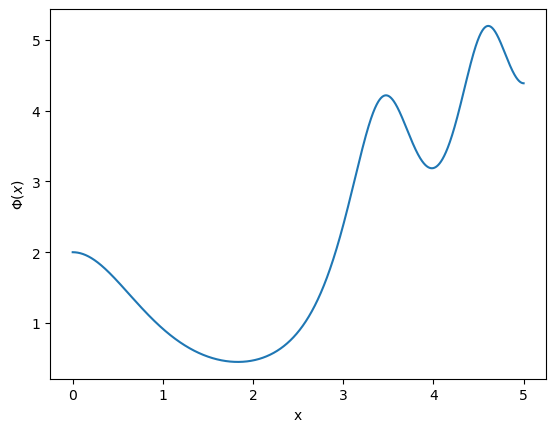

In [14]:
Phi0 = 2.0

vec = array([Phi0, 0], complex)
phivec = [vec[0]]

for x in arange(a+h, b, h):
    vec = RK4(vec, x)

    phivec.append(vec[0])

plt.xlabel('x')
plt.ylabel(r'$\Phi(x)$')
plt.plot(arange(a, b, h), phivec)

$\quad$ Está claro que algo relevante aconteceu ao alterarmos o valor de $\Phi(0)$ de $2.5$ para $2.0$. Enquanto para $\Phi(0) = 2.5$ a função de onda divergia para baixo, quando tentamos $\Phi(0) = 2.0$, vimos que ela divergiu na direção positiva! Isso ocorreu, pois, no limite assintótico, a função de onda varia monotonicamente com relação às alterações dessa condição inicial. Esse fato, por sua vez, indica que a solução desejada, para a qual $\lim_{x \rightarrow \infty}\Phi(x) = 0$, deve ter um valor de $\Phi(0)$ entre $2.0$ e $2.5$, de forma que a solução diverge para cima se o valor de $\Phi(0)$ for menor do que o correto e diverge para baixo se for maior. A partir desse fato, podemos encontrar o valor correto de $\Phi(0)$ através do método do chute. Este, por sua vez, consiste em chutar um valor para $\Phi(0)$, verificar a divergência da função no limite assintótico e, dependendo da direção dela, alterar o chute inicial para mais ou para menos, calcular o erro com base na Equação **(2.3)** e tentar de novo. Caso entre duas iterações do procedimento o sinal do erro mude, sabemos que a solução correta estará entre os dois últimos valores, assim, invertemos o sinal da variação do chute inicial e reduzimos seu módulo pela metade. Repetimos assim esse procedimento até encontrarmos a solução correta.

$\Phi(0) = $ 2.282815302417027


C:\Users\tiago\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


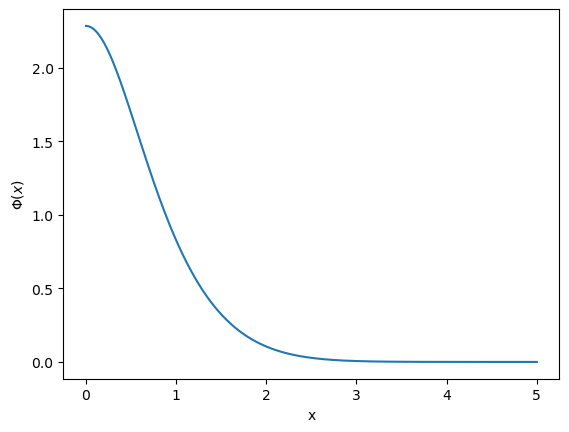

In [15]:
# Chute inicial
guess = 2

#Variação do chute
dguess = 1

vec = array([guess, 0], complex)
phivec = [vec[0]]

# Encontrar a solução com o chute inicial
for x in arange(a+h, b, h):
    vec = RK4(vec, x)
    
    # Consideramos termos muito pequenos como 0 para evitar instabilidades numéricas
    if vec[0] <1e-12:
        vec[0] = 0

    phivec.append(vec[0])

# Calcular o erro dessa solução a partir da equação (2.3)
erro =  ((vec[1])) - (vec[0]*(-x + (alpha-1)/x))

# Iniciar o loop de iterações até conseguir uma precisão aceitável.
for i in range(100):

    vec = array([guess, 0], complex)
    phivec = [vec[0]]
    for x in arange(a+h, b, h):
        vec = RK4(vec, x)
        
        # Consideramos termos muito pequenos como 0 para evitar instabilidades numéricas
        if vec[0] <1e-12:
            vec[0] = 0

        phivec.append(vec[0])
    
    # A variável last guarda o erro da iteração anterior.
    last = erro
    
    erro = ((vec[1])) - (vec[0]*(-x + (alpha-1)/x))
    
    # Se o produto dos dois últimos erros for < 0, ou seja, se seus sinais forem diferentes, alteramos a variação no chute
    if erro*last < 0:

        dguess = -dguess/2
    
    # Alteramos o chute inicial para a próxima iteração.
    guess = guess + dguess

phivec = array(phivec)

plt.xlabel('x')
plt.ylabel(r'$\Phi(x)$')
plt.plot(arange(a, b, h), phivec)
print(r'$\Phi(0) = $', guess)

$\quad$ Podemos ver claramente que a solução acima obedece às condições de contorno do nosso problema, logo, é o gráfico da função de onda correta! Vemos também que o valor de $\Phi(0) \approx 2.2828$ estava entre $2.0$ e $2.5$, como imaginamos.

## 3. Resultados

$\quad$ Nesta seção, utilizaremos o procedimento construído acima para estudar o comportamento e as propriedades das soluções da equação de Gross-Pitaevskii com simetria esférica para diferentes valores de $\alpha$.

### 3.1. Variando $\alpha$

$\quad$ A partir do procedimento elaborado anteriormente, uma simples mudança no valor de $\alpha$ nos códigos da Seção **2.2** altera a solução da equação. Assim, ao variar o valor de $\alpha$, podemos estudar como a nossa solução muda para potenciais químicos diferentes, por exemplo. 

C:\Users\tiago\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\tiago\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\tiago\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\tiago\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\tiago\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


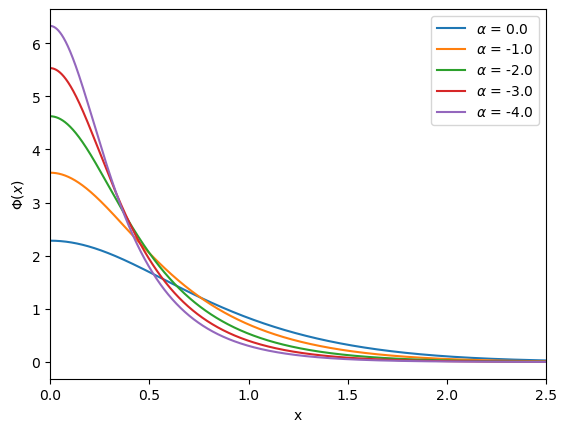

In [16]:
# Valores de alpha para os quais resolveremos a equação de Gross-Pitavskii
alphavec = [0.0, -1.0, -2.0, -3.0, -4.0]

for alpha in alphavec:
    # Chute inicial
    guess = 2

    #Variação do chute
    dguess = 1

    vec = array([guess, 0], complex)
    phivec = [vec[0]]

    # Encontrar a solução com o chute inicial
    for x in arange(a+h, b, h):
        vec = RK4(vec, x)

        # Consideramos termos muito pequenos como 0 para evitar instabilidades numéricas
        if vec[0] <1e-12:
            vec[0] = 0

        phivec.append(vec[0])

    # Calcular o erro dessa solução a partir da equação (2.3)
    erro =  ((vec[1])) - (vec[0]*(-x + (alpha-1)/x))

    # Iniciar o loop de iterações até conseguir uma precisão aceitável.
    for i in range(100):

        vec = array([guess, 0], complex)
        phivec = [vec[0]]
        for x in arange(a+h, b, h):
            vec = RK4(vec, x)

            # Consideramos termos muito pequenos como 0 para evitar instabilidades numéricas
            if vec[0] <1e-12:
                vec[0] = 0

            phivec.append(vec[0])

        # A variável last guarda o erro da iteração anterior.
        last = erro

        erro = ((vec[1])) - (vec[0]*(-x + (alpha-1)/x))

        # Se o produto dos dois últimos erros for < 0, ou seja, se seus sinais forem diferentes, alteramos a variação no chute
        if erro*last < 0:

            dguess = -dguess/2

        # Alteramos o chute inicial para a próxima iteração.
        guess = guess + dguess


    plt.plot(arange(a, b, h), phivec, label = r'$\alpha$ = ' + str(alpha))

plt.legend()
plt.xlabel('x')
plt.xlim([0, 2.5])
plt.ylabel(r'$\Phi(x)$')
plt.show()

$\quad$ Podemos claramente ver, no gráfico acima, que conforme variamos o valor de $\alpha$ entre $0$ e $-4$ a função de onda apresenta um pico cada vez mais alto em $x = 0$ e decai cada vez mais rápido em direção ao 0 no limite assintótico. Assim, presume-se que, para substâncias com potencial químico maior, devido às interações atrativas do nosso condensado de Bose-Einstein, os bósons devem tender a se concentrar mais ao centro do recipiente onde depositarmos o condensado.

### 3.2. Número de Bósons

$\quad$ Na seção acima vimos que, ao variar $\alpha$, a função de onda do condensado de Bose-Einstein tem variações no seu comportamento no que diz respeito à concentração de bósons próximos à origem, diminuindo efetivamente a distância média das partículas ao centro conforme $\alpha$ varia entre $0$ e $-4$. Outra quantidade de interesse a se investigar é o número de bósons no condensado que ocupam o estado de mais baixa energia. Conforme a referência [3], o número de bósons no condensado pode ser calculado da seguinte forma:

$$N = \frac{\pi \hbar^2}{mg}\int_0^{\infty} x|\Phi(x)|^2 dx \ . \tag{3.1.}$$

$\quad$ Estudos anteriores citados em [3] encontraram que condensação de Bose-Einstein é observada para valores de $\eta = \frac{mg}{\pi \hbar^2} < 0.001$. Como inicialmente não definimos nenhum valor específico para a massa $m$ dos bósons do nosso condensado ou para a constante de acoplamento $g$, podemos escolher agora valores arbitrários obedecendo à condição de condensação supracitada. Numa situação realística, utilizaríamos valores correspondentes ao gás de Bose específico estudado. Aqui, porém, podemos simplesmente tomar um valor de $\eta = 0.0001$ tal que $N = 10000\int_0^{\infty} x|\Phi(x)|^2 dx$. É importante notar que, como $\Phi(x) = 0$ depois de $x = b = 5$ como vimos na seção 2.2, assim, a integral deve se anular a partir desse valor e, consequentemente, só precisamos integrar de $0$ a $b$. Para resolver essa integral, basta usarmos a regra de Simpson, que consiste em dividir a área sob a função com vários polinômios de segundo grau e calcular a área desses como aproximação para a integral que desejamos resolver. Façamos isso para os valores de $\alpha$ utilizados na Seção **3.1**:

In [17]:
# Valores de alpha para os quais resolveremos a equação de Gross-Pitavskii
alphavec = [0.0, -1.0, -2.0, -3.0, -4.0]

for alpha in alphavec:
    # Chute inicial
    guess = 2

    #Variação do chute
    dguess = 1

    vec = array([guess, 0], complex)
    phivec = [vec[0]]

    # Encontrar a solução com o chute inicial
    for x in arange(a+h, b, h):
        vec = RK4(vec, x)

        # Consideramos termos muito pequenos como 0 para evitar instabilidades numéricas
        if vec[0] <1e-12:
            vec[0] = 0

        phivec.append(vec[0])

    # Calcular o erro dessa solução a partir da equação (2.3)
    erro =  ((vec[1])) - (vec[0]*(-x + (alpha-1)/x))

    # Iniciar o loop de iterações até conseguir uma precisão aceitável.
    for i in range(100):

        vec = array([guess, 0], complex)
        phivec = [vec[0]]
        for x in arange(a+h, b, h):
            vec = RK4(vec, x)

            # Consideramos termos muito pequenos como 0 para evitar instabilidades numéricas
            if vec[0] <1e-12:
                vec[0] = 0

            phivec.append(vec[0])

        # A variável last guarda o erro da iteração anterior.
        last = erro

        erro = ((vec[1])) - (vec[0]*(-x + (alpha-1)/x))

        # Se o produto dos dois últimos erros for < 0, ou seja, se seus sinais forem diferentes, alteramos a variação no chute
        if erro*last < 0:

            dguess = -dguess/2

        # Alteramos o chute inicial para a próxima iteração.
        guess = guess + dguess

    # Realiza a integração numérica utilizando a regra de Simpson.
    xvec = arange(a, b, h)
    soma = 0
    k = 1
    for i in range(len(xvec)):
        
        if i == 0 or i == len(xvec)-1:
            k = 1/3
        elif i%2 == 0:
            k = 2/3
        elif i%2 != 0:
            k = 4/3
            
        soma += k*xvec[i]*abs(phivec[i])**2
        
    integral = soma*h
    
    num = 10000*integral
    
    print('Para alpha = ', alpha, ',', 'N = ', num)

Para alpha =  0.0 , N =  12652.056784252643
Para alpha =  -1.0 , N =  16523.928731045486
Para alpha =  -2.0 , N =  17687.762609038175
Para alpha =  -3.0 , N =  18116.449972778228
Para alpha =  -4.0 , N =  18308.65492614724


$\quad$ Esse resultado é um tanto quanto curioso! É visível nos valores acima que, conforme $\alpha$ varia entre $0$ e $-4$, $N$ parece tender em direção a um limite superior assintótico, uma vez que o valor de $N$ varia cada vez mais lentamente conforme o módulo de $\alpha$ cresce, com uma variação já muito pequena de $\alpha = -3$ para $\alpha = -4$. Há, aparentemente, um limite superior para o número de bósons num condensado de Bose-Einstein com simetria esférica e interações atrativas que, para $\eta = 0.0001$ como utilizamos aqui, parece ser não muito superior a $N = 18308$. Utilizando os métodos numéricos desenvolvidos neste `Notebook`, conseguimos não só descobrir esse limite superior como também conseguimos estimá-lo!

## 4. Conclusão

$\quad$ Neste `Notebook`, desenvolvemos a teoria dos condensados de Bose-Einstein e investigamos numericamente seu comportamento no caso com simetria esférica e interações atrativas, utilizando as condições de contorno determinadas pelo problema para solucionar a equação de Gross-Pitaevskii e assim, encontrar as funções de onda que descrevem esses sistemas.

$\quad$ Utilizando as soluções encontradas, estudamos também a variação da função de onda do condensado de Bose-Einstein conforme variamos o potencial químico do gás de Bose utilizado para gerar o condensado e encontramos um limite superior para a quantidade de bósons que pode estar presente no sistema, mostrando assim o poder das soluções numéricas na descoberta de propriedades tanto quantitativas como qualitativas de sistemas físicos.

$\quad$ Os resultados obtidos numericamente e discutidos ao longo do texto oferecem fortes _insights_ sobre o comportamento de condensados de Bose-Einstein com interações atrativas, evidenciando também as condições delicadas sob as quais esses condensados podem se formar e existir. 

$\quad$ Espero que tudo o que foi aqui exposto tenha despertado o interesse do leitor acerca dessa interessantíssima fase da matéria! A quem tiver interesse em utilizar os códigos aqui disponibilizados para realizar um estudo próprio sobre os condensados de Bose-Einstein, recomendo a leitura da referência [3] para mais informações sobre os métodos utilizados. 

## Referências

[1] L. Landau e E. Lifchitz, Mécanique Quantique: Théorie Non Relativiste, 3ª edição. Tradução francesa: Éditions Mir, 1974.

[2] L. Pitaevskii e S. Stringari, Bose-Einstein Condensation and Superfluidity. 1ª edição. Oxford University Press, 2016.

[3] Sadhan K. Adhikari, Numerical solution of the two-dimensional Gross–Pitaevskii equation for trapped interacting atoms, Physics Letters A, 2000.
